In [21]:
import contract_utilities.contract_meta_info as cmi
set(cmi.futures_butterfly_strategy_tickerhead_list)

mergedlist = list(set(cmi.futures_butterfly_strategy_tickerhead_list + cmi.cme_futures_tickerhead_list))
mergedlist

tickerhead_list = ['LN', 'LC', 'FC','C', 'S', 'SM', 'BO', 'W', 'KW','SB', 'KC', 'CC', 'CT', 'OJ',
                                              'CL', 'HO', 'RB', 'NG', 'ED','ES', 'NQ', 'EC', 'JY', 'AD', 'CD', 'BP',
                               'TY', 'US', 'FV', 'TU', 'GC', 'SI']

['CC',
 'S',
 'C',
 'TU',
 'SI',
 'KC',
 'US',
 'FV',
 'NG',
 'CD',
 'RB',
 'FC',
 'SB',
 'ED',
 'EC',
 'LN',
 'KW',
 'AD',
 'SM',
 'TY',
 'LC',
 'CT',
 'B',
 'BO',
 'OJ',
 'CL',
 'JY',
 'HO',
 'BP',
 'GC',
 'W',
 'ES',
 'NQ']

In [2]:
import opportunity_constructs.cot_strategy as cs
output = cs.get_cot_sheet_4date(date_to=20200626)
output['cot_sheet']

# LC can be a good buy
# longs: LC, C, SM, KW, ES, 
# short: EC, JY, TY

,ticker_head,cot_index_slow
0,LN,64.783397
1,LC,86.812686
2,FC,60.187175
3,C,98.758612
4,S,17.990839
5,SM,80.835986
6,BO,60.292136
7,W,65.368633
8,KW,100.000000
9,SB,32.664504


Index(['settle_date', 'tr_dte_x', 'close_price_x', 'tr_dte_y', 'close_price_y',
       'ticker', 'change_1', 'const_mat', 'Open Interest',
       'Noncommercial Long', 'Noncommercial Short', 'Noncommercial Spreads',
       'Commercial Long', 'Commercial Short', 'Total Long', 'Total Short',
       'Nonreportable Positions Long', 'Nonreportable Positions Short',
       'comm_net', 'spec_net', 'comm_min', 'comm_max', 'cot_index_slow'],
      dtype='object')


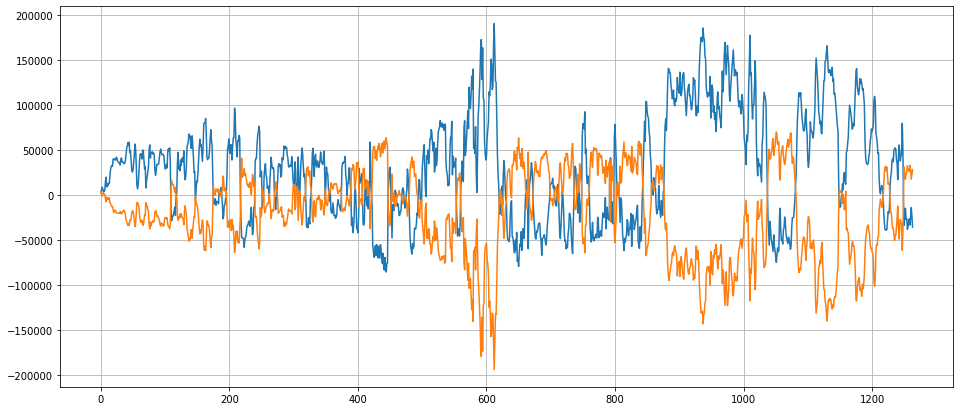

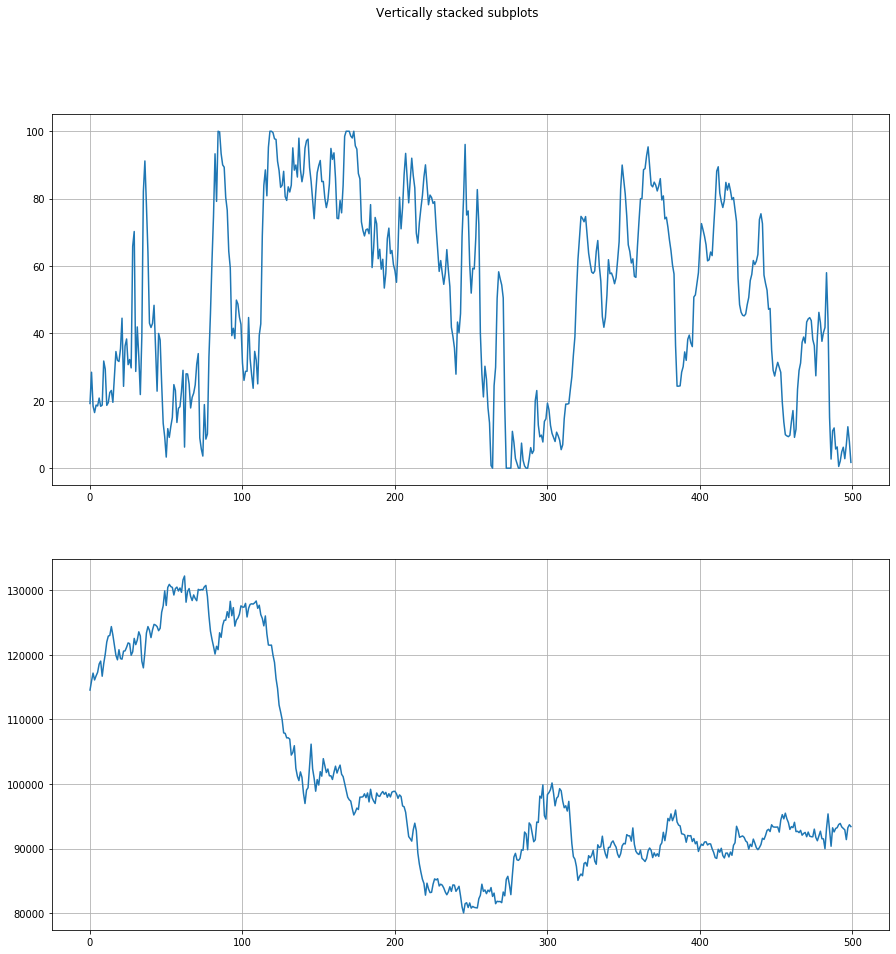

In [5]:
import signals.futures_directional_signals as fds
output = fds.get_cot_strategy_signals(ticker_head='JY',date_to=20200626)
combined_data = output['combined_data']
print(combined_data.columns)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 7))
plt.plot(range(len(combined_data.index)),combined_data['comm_net'],
         range(len(combined_data.index)),combined_data['spec_net'])
plt.grid()            
plt.show()

fig, (ax1, ax2) = plt.subplots(2,figsize=(15,15))
fig.suptitle('Vertically stacked subplots')

combined_data = combined_data.iloc[-500:]
ax1.plot(range(len(combined_data.index)),combined_data['cot_index_slow'])
ax1.grid()
ax2.plot(range(len(combined_data.index)),combined_data['const_mat'])
ax2.grid()

In [11]:


import contract_utilities.expiration as exp
report_date = exp.doubledate_shift_bus_days()

In [12]:
# Create DB Strategy

import ta.strategy as ts
ts.generate_db_strategy_from_strategy_sheet(id=62,strategy_class='futures_butterfly',report_date=report_date)

{'alias': 'BOZ2020F2021F2021H2021', 'strategy_id': 286}

In [3]:
# Create Misc Strategy
import ta.strategy as ts
alias= 'LNG21Z20VCS'
#description_string = 'strategy_class=optionInventory'
description_string = 'strategy_class=vcs&betsize=71033'
#description_string = 'strategy_class=delta'
#description_string = 'strategy_class=scv&betsize=14204'
#description_string = 'strategy_class=discretionary'
#description_string = 'strategy_class=spread_carry&betsize=7068'
output = ts.generate_db_strategy_from_alias(alias=alias,description_string=description_string)
output

{'alias': 'LNG21Z20VCS', 'strategy_id': 306}

In [10]:
import ta.trade_fill_loader2 as tfl
import datetime as dt
#wuhu = tfl.assign_trades_2strategies(trade_source='tt')
#wuhu

tfl.load_tt_trades(tags2exclude=['ifs','sc','ocs','DeltaHedge'])     # 'DeltaHedge','ocs','sc'

tfl.load_tagged_tt_trades()
#tfl.load_cme_direct_trades()
#tfl.load_manual_entry_trades()
#wuhu = tfl.get_formatted_tt_fills()
#wuhu['aggregate_trades']

#tfl.load_latest_tt_fills()
#dt.datetime.strptime(wuhu['Contract'].values[40],'%y-%b')


#tfl.load_cme__fills()
#wuhu = tfl.get_formatted_cme_direct_fills()
#wuhu['aggregate_trades']

Need to create HOX2020_HOZ2020_ocs
Need to create NGF2021_NGG2021_ocs
Need to create NGK2021_NGM2021_ocs


In [3]:
import ta.trade_fill_loader as tfl
wuhu = tfl.get_formatted_manual_entry_fills(tags2exclude=['ifs','sc','ocs','DeltaHedge'])
wuhu

,ticker,option_type,strike_price,trade_price,trade_quantity
0,SU2016,P,1040,24.875,5
1,SU2016,C,1040,90.625,5
2,SX2016,P,1020,32.250,-5
3,SX2016,C,1020,97.250,-5


In [11]:

#Daily Hedge

import ta.strategy_hedger as sh
import shared.calendar_utilities as cu
import ta.strategy as tas
#sh.strategy_hedge_report(delta_alias='delta_aug19')
import ta.strategy as tas

wuhu  = tas.get_net_position_4strategy_alias(alias='delta_jun20',as_of_date=cu.get_doubledate())
wuhu



,ticker,option_type,strike_price,instrument,qty
0,CH2021,None,NaN,F,0.34
1,CZ2020,None,NaN,F,-0.30
6,LCV2020,None,NaN,F,0.18
7,LCZ2020,None,NaN,F,0.06
8,LNG2021,None,NaN,F,-0.48
9,LNV2020,None,NaN,F,0.52
10,LNZ2020,None,NaN,F,0.02
13,NGX2020,None,NaN,F,0.19
14,NGZ2020,None,NaN,F,-0.20
17,WH2021,None,NaN,F,-0.28


In [1]:
import ta.strategy_greeks as sg
import pandas as pd
import get_price.get_options_price as gop
output = sg.get_greeks_4strategy_4date(alias='ESM2019_short_scv')

# SIU16Z16VCS
output['ticker_portfolio']
#output['strike_portfolio']
# 2.6/ -5.2
# 3/-6
#output['strike_portfolio']

# silver portfolio might cause problems
#output

# Z7 vol from 29.15 to 27.6
# to 29.6 to 28
output['ticker_portfolio']
output['ticker_portfolio']
print(output['strike_portfolio']['total_oev'].sum())
output['ticker_portfolio']
output['strike_portfolio']

-67.9495119269001


,ticker,option_type,strike_price,instrument,qty,theta,vega,delta,delta_diff,oev,total_oev,dollar_theta,dollar_vega
0,ESM2019,C,2940.0,O,-34.0,-0.243703,950.085163,0.473640,0.026360,0.999259,-33.974803,414.295083,-16151.447766
1,ESM2019,P,2940.0,O,-34.0,-0.241173,950.082544,-0.507428,1.007428,0.999256,-33.974709,409.994746,-16151.403241


In [14]:
import ta.strategy_hedger as sh
sh.get_hedge_4strategy(alias='SIN17U17VCS')

,underlying_ticker,hedge_price,option_delta,underlying_delta,total_delta,hedge
0,SIN2017,18.0775,4.90,-5.10,-0.20,0.20
1,SIU2017,18.1400,-4.76,5.13,0.37,-0.37


In [6]:
import ta.strategy as ts
ts.move_position_from_strategy_2_strategy(strategy_from='delta_apr20',strategy_to='delta_jun20')

In [5]:
import ta.pnl as tapnl
alias = 'ESH21Z20VCS'
tapnl.close_strategy(alias=alias,broker='abn')


In [13]:

import ta.man_position_reconciler as mpr
mpr.reconcile_position()

,generalized_ticker,qty_x,ticker,option_type,strike_price,instrument,qty_y,qty_diff
1,SMH2021,64.0,SMH2021,None,None,F,67.00,-3.0
2,SMK2021,-44.0,SMK2021,None,None,F,-47.00,3.0
3,BOZ202,40.0,NaN,NaN,NaN,NaN,NaN,NaN
4,BOF2021,-189.0,BOF2021,None,None,F,-109.00,-80.0
5,BOH2021,149.0,BOH2021,None,None,F,109.00,40.0
6,CZ202,81.0,CZ2020,None,None,F,58.00,23.0
9,CH2021,-97.0,CH2021,None,None,F,-74.00,-23.0
16,SH2021,38.0,NaN,NaN,NaN,NaN,NaN,NaN
17,SK2021,36.0,SK2021,None,None,F,74.00,-38.0
19,WZ202,-80.0,WZ2020,None,None,F,-87.00,7.0


In [15]:
import shared.calendar_utilities as cu
import ta.strategy as tas
wuhu  = tas.get_net_position_4strategy_alias(alias='NGF2021_NGG2021_ocs',as_of_date=cu.get_doubledate())
wuhu

# buy SIN


,ticker,option_type,strike_price,instrument,qty
0,NGF2021,None,NaN,F,-65.0
1,NGG2021,None,NaN,F,65.0


In [8]:
wuhu  = tas.get_net_position_4strategy_alias(alias='TYZ2018_short_scv')
wuhu

,ticker,option_type,strike_price,instrument,qty


In [6]:
import ta.position_close_helper as pch

#pch.calc_intrday_pnl_from_prices(alias='LCZ2020_long_scv',structure_price=11.65,LCZ2020=103.325)
pch.calc_intrday_pnl_from_prices(alias='ESH21Z20VCS',structure_price=81.5,ESZ2020=3021.5,ESH2021=3014)
#pch.calc_intrday_pnl_from_prices(alias='SU20X20VCS',structure_price=7.75,SU2020=964.25,SX2020=965)
#pch.calc_intrday_pnl_from_prices(alias='SIZ2020_short_scv',structure_price=0.045,BON2020=26.45,BOQ2020=26.63)
# sell 1 ESZ


{'structure_pnl': 4375.0,
 'futures_pnl': -3712.9999999999854,
 'structure_settle': 79.75}

In [4]:
import ta.position_close_helper as pch
pch.calc_intrday_pnl_from_prices(alias='SF2020_long_scv',structure_price=70,SF2020=955.75)
# sell 2 WH futures

{'structure_pnl': -131.25, 'futures_pnl': -153.375, 'structure_settle': 70.375}

In [6]:
0.8125*64

52.0

In [9]:
import ta.position_close_helper as pch
pch.calc_intraday_structure_pnl_from_prices(ticker_list=['WH2019'],
                                            structure_price = 74.375,
                                            strike_list=[580],
                                            underlying_price_list=[529.25],
                                            qty = 8,
                                            structure_type='straddle')


# sell 2 LNM futures 

C:\Research\PycharmProjects\ta\position_close_helper.py:89: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  ('qty', [1, 1])])


{'total_pnl': -112.96068,
 'structure_pnl': -200.0,
 'delta_pnl': 87.03932,
 'structure_price_yesterday': 74.875}

In [7]:
import ta.position_close_helper as pch
pch.calc_intraday_structure_pnl_from_prices(ticker_list=['BON2020','BOQ2020'],
                                            structure_price =-0.085,
                                            strike_list=[30,30],
                                            underlying_price_list=[25.46,25.66],
                                            qty =4,
                                            structure_type='straddle_spread')

{'total_pnl': -56.07016320000085,
 'structure_pnl': -204.00000000000003,
 'delta_pnl': 147.92983679999918,
 'structure_price_yesterday': 0.0}

In [7]:
import ta.position_close_helper as pch
pch.calc_intraday_structure_pnl_from_prices(ticker_list=['NGU2020','NGV2020'],
                                            structure_price =0.063,
                                            strike_list=[2.1,2.15],
                                            underlying_price_list=[1.82,1.916],
                                            qty =50,
                                            structure_type='straddle_spread')

# sell 7 ZSN futures

{'total_pnl': 1115.9947050000133,
 'structure_pnl': -1999.999999999974,
 'delta_pnl': 3115.9947049999873,
 'structure_price_yesterday': 0.06699999999999995}

In [15]:
import ta.position_close_helper as pch
pch.calc_intraday_structure_pnl_from_prices(ticker_list=['LCM2020','LCQ2020'],
                                            structure_price =-2.31,
                                            strike_list=[111,110],
                                            underlying_price_list=[81.3,83.9],
                                            qty =25,
                                            structure_type='straddle_spread')

{'total_pnl': 9535.553512500079,
 'structure_pnl': 1399.9999999999568,
 'delta_pnl': 8135.553512500122,
 'structure_price_yesterday': -2.4499999999999957}

In [28]:
import ta.position_close_helper as pch
pch.calc_intraday_structure_pnl_from_prices(ticker_list=['ESZ2019'],
                                            structure_price =248.5,
                                            strike_list=[2890],
                                            underlying_price_list=[2888],
                                            qty =21,
                                            structure_type='straddle')

{'total_pnl': 232.20795150000004,
 'structure_pnl': 0.0,
 'delta_pnl': 232.20795150000004,
 'structure_price_yesterday': 248.5}